# Movie Recommendation System

This AI project aims to provide relevant recommendations of movies to the user.I have used techniques like 'K-Means clustering', 'content based filtering' and 'collaborative filtering'. In this project I haved used a huge dataset to do my analysis which contains more than fourty thousand movie collections with rating respectively. The dataset that I have used is 'movies_initial.csv' from the website Kaggle.

## K-Means clustering using python
### Introduction
#### Clustering  
Clustering is one of the exploratory data analysis method widely used to find homogeneous subgroups within the data in each cluster having a similarity measure(application-specific) such as correlation- based distance or euclidean-based distance. Here we will try to recommend movies that have similar genres or high ratings. I will be investigating the structure of data by grouping the movies into distinct subgroups. 
'K-Means clustering' is the most popular unsupervised learning algorithm, that does not have a target variable . This algorithm is used when we have data without a category or group. K-Means algorithm is used to assign each data point to one of K groups based on the features that are provided in an iterative pattern. Some of the applications are Image segmentation, Recommendation Systems etc.

### Implementation


In [2]:
# Importing libraries 
import pandas as pd

# For Data visualisation
import matplotlib.pyplot as plt

### Exploratory Data Analysis

The dataset I am going to use in this project is from Kaggle(Data-Science Company). I am going to use two datasets namely 'movies_initial.csv' (40 MB) and 'movies_dataset' the small version of it (9.6 MB). The movies dataframe contains the variables imdbID, title, year and genre. The list of genres of a particular movie appear in string and are separated by the comma ( , ) symbol.

In [3]:
# Import the movies dataset
film_data = pd.read_csv('movies_initial.csv',encoding='unicode_escape')
# preview of the dataset
film_data.head(5)

,imdbID,title,year,rating,runtime,genre,released,director,writer,cast,...,imdbRating,imdbVotes,poster,plot,fullplot,language,country,awards,lastupdated,type
0,1,Carmencita,1894,NOT RATED,1 min,"Documentary,Short",NaN,William K.L. Dickson,NaN,Carmencita,...,5.9,1032.0,https://m.media-amazon.com/images/M/MV5BMjAzND...,Performing on what looks like a small wooden s...,Performing on what looks like a small wooden s...,NaN,USA,NaN,03:45.0,movie
1,5,Blacksmith Scene,1893,UNRATED,1 min,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",...,6.2,1189.0,NaN,Three men hammer on an anvil and pass a bottle...,A stationary camera looks at a large anvil wit...,NaN,USA,1 win.,03:50.1,movie
2,3,Pauvre Pierrot,1892,NaN,4 min,"Animation,Comedy,Short",1892-10-28,ýýýmile Reynaud,NaN,NaN,...,6.7,566.0,NaN,"One night, Arlequin come to see his lover Colo...","One night, Arlequin come to see his lover Colo...",NaN,France,NaN,06:02.7,movie
3,8,Edison Kinetoscopic Record of a Sneeze,1894,NaN,1 min,"Documentary,Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,...,5.9,988.0,NaN,A man (Thomas Edison's assistant) takes a pinc...,A man (Edison's assistant) takes a pinch of sn...,NaN,USA,NaN,21:07.1,movie
4,10,Employees Leaving the Lumiï¿½ï¿½ï¿½re F,1895,NaN,1 min,"Documentary,Short",1895-03-22,Louis Lumiï¿½ï¿,NaN,NaN,...,6.9,3469.0,NaN,A man opens the big gates to the Lumiï¿½ï¿½ï¿½...,A man opens the big gates to the Lumiï¿½ï¿½ï¿½...,NaN,France,NaN,03:56.6,movie


In the output obtained below, data type of each column is listed. There are 20 column names in this dataset with types such as int, object, float.

In [4]:
# Checking data type of each column
film_data.dtypes

imdbID           int64
title           object
year            object
rating          object
runtime         object
genre           object
released        object
director        object
writer          object
cast            object
metacritic     float64
imdbRating     float64
imdbVotes      float64
poster          object
plot            object
fullplot        object
language        object
country         object
awards          object
lastupdated     object
type            object
dtype: object

In the code below, I am deleting columns such as rating, runtime, released, director, writer, cast, metacritic, imdbVotes, poster, plot, fullplot, language, country, awards, lastupdated, type, that are unnecessary for my analysis. I will be using only imdb, title of the movie, year, genre, and imdbRating variables.

In [5]:
# dropping unnecessary columns from the datset film_data
film_data = film_data.drop(['rating','runtime','released','director','writer',
                            'cast','metacritic','imdbVotes','poster','plot','fullplot',
                            'language','country','awards','lastupdated','type'], axis=1)
# to preview the dataset
film_data.head()

,imdbID,title,year,genre,imdbRating
0,1,Carmencita,1894,"Documentary,Short",5.9
1,5,Blacksmith Scene,1893,Short,6.2
2,3,Pauvre Pierrot,1892,"Animation,Comedy,Short",6.7
3,8,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short",5.9
4,10,Employees Leaving the Lumiï¿½ï¿½ï¿½re F,1895,"Documentary,Short",6.9


In [6]:
# to view the summary of the dataset
film_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbID      46014 non-null  int64  
 1   title       46014 non-null  object 
 2   year        46014 non-null  object 
 3   genre       45834 non-null  object 
 4   imdbRating  44300 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
# to take a look at the no of rows and columns in the dataset
film_data.shape

(46014, 5)

In [8]:
# to view the statistical summary of numerical variables
film_data.describe()

,imdbID,imdbRating
count,4.601400e+04,44300.000000
mean,8.552062e+05,6.381454
std,1.141979e+06,1.183113
min,1.000000e+00,1.100000
25%,8.165750e+04,5.800000
50%,2.524875e+05,6.600000
75%,1.370868e+06,7.200000
max,5.023260e+06,9.600000


In the above output, we can see the statistical summary of imdbID and imdbRating.

To view the total no of movies with their rating within the dataframe in the below code.

In [9]:
# Print out the number of users, movie titles and ratings
print('The film_dataset contains',len(film_data),'movies.')
print('The dataset also contains', len(film_data["imdbID"].unique()), 'users,',len(film_data['title'].unique()),'unique movies and',len(film_data),'ratings.')

The film_dataset contains 46014 movies.
The dataset also contains 44497 users, 41506 unique movies and 46014 ratings.


To view the ratings provided by the users for a movie in the below code.

In [10]:
# Get unique values for ratings
print('Users can rate movies as:',sorted(film_data["imdbRating"].unique()))

Users can rate movies as: [4.0, 4.4, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, nan, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.1, 4.2, 4.3, 4.5, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6]


In [11]:
# To take a look at the columns that have a lot of null values in it
Nullpercent = film_data.isnull().sum().sort_values(ascending = False) / len(film_data) * 100
null_df = pd.DataFrame({'Features': Nullpercent.index, 'Null_Value_Percentage': Nullpercent.values}).style.background_gradient(cmap='Blues')
null_df

,Features,Null_Value_Percentage
0,imdbRating,3.724953
1,genre,0.391185
2,imdbID,0.000000
3,title,0.000000
4,year,0.000000


From the result above imdbID, title, year do not have null values, whereas imdbRating and genre have a null value percentage of 3.7 and 0.39 on a whole. 

In [12]:
#check for the missing values in datset
film_data.isna().sum()

imdbID           0
title            0
year             0
genre          180
imdbRating    1714
dtype: int64

From the above result I can see that there are 2 redundant columns in the dataframe with 180 and 1714 missing values.

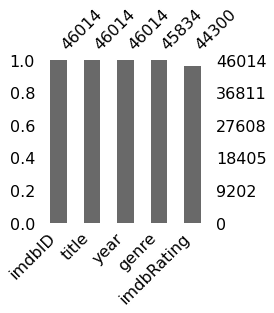

In [13]:
#!pip install missingno
# to preview the missing values in a bar gragh
import missingno as msno
msno.bar(film_data,figsize=(3, 3));

In [14]:
# view the unique labels(year) in the variable
film_data['year'].unique()

array(['1894', '1893', '1892', '1895', '1896', '1897', '1898', '1899',
       '1900', '1901', '1902', '1903', '1905', '1904', '1912', '1908',
       '1906', '1907', '1909', '1910', '1911', '1913', '1914', '1915',
       '1916', '1918', '1917', '1919', '1920', '1921', '1922', '1923',
       '1924', '1929', '1925', '1926', '1935', '1927', '1928', '1930',
       '1931', '1932', '1933', '1934', '1936', '1938', '1937', '1940',
       '1939', '1943', '1948', '1941', '1942', '1959', '1944', '2001',
       '1945', '1946', '1947', '1949', '1952', '1950', '1951', '1953',
       '1954', '1955', '1956', '1957', '1965', '1958', '1984', '1962',
       '1960', '1961', '1963', '1971', '1964', '1966', '1967', '1969',
       '1970', '1968', '1972', '1981', '1989', '1990', '1976', '1974',
       '1973', '2015', '1975', '1978', '1977', '1979', '1980', '1979ï¿½',
       '1982', '1980ï¿½', '1983', '1987', '1993', '1981ï¿½', '1985',
       '1986', '1988', '1986ï¿½', '1987ï¿½', '1988ï¿½', '1991', '2002',
    

In [15]:
# to replace the missing year in a proper format
film_data['year'] = film_data['year'].replace(('1979ï¿½','1981ï¿½','1980ï¿½','1986ï¿½','1987ï¿½','1988ï¿½','1994ï¿½','1996ï¿½','1997ï¿½','1995ï¿½','1998ï¿½1999','2000ï¿½','1985ï¿½','1984ï¿½','1976ï¿½','1999ï¿½','1971ï¿½','2001ï¿½2004','2001ï¿½','2002ï¿½','2003ï¿½','2004ï¿½','2005ï¿½','2006ï¿½','2006ï¿½2012','2006ï¿½2007','2007ï¿½','2008ï¿½','2009ï¿½','2016ï¿½','2011ï¿½','2012ï¿½','2010ï¿½','1982ï¿½1986','2014ï¿½','2015ï¿½','1994ï¿½1998','1994ï¿½ï¿½ï','1998ï¿½ï¿½ï','2001ï¿½ï¿½ï',
       '2006ï¿½ï¿½ï','1982ï¿½ï¿½ï'),('1979','1981','1980','1986','1987','1988','1994','1996','1997','1995','1998','2000','1985','1984','1976','1999','1971','2004','2001','2002','2003','2004','2005','2006','2006','2006','2007','2008','2009','2016','2011','2012','2010','1982','2014','2015','1994','2004','2008','2001','2006','1982'))
film_data['year'].unique()

array(['1894', '1893', '1892', '1895', '1896', '1897', '1898', '1899',
       '1900', '1901', '1902', '1903', '1905', '1904', '1912', '1908',
       '1906', '1907', '1909', '1910', '1911', '1913', '1914', '1915',
       '1916', '1918', '1917', '1919', '1920', '1921', '1922', '1923',
       '1924', '1929', '1925', '1926', '1935', '1927', '1928', '1930',
       '1931', '1932', '1933', '1934', '1936', '1938', '1937', '1940',
       '1939', '1943', '1948', '1941', '1942', '1959', '1944', '2001',
       '1945', '1946', '1947', '1949', '1952', '1950', '1951', '1953',
       '1954', '1955', '1956', '1957', '1965', '1958', '1984', '1962',
       '1960', '1961', '1963', '1971', '1964', '1966', '1967', '1969',
       '1970', '1968', '1972', '1981', '1989', '1990', '1976', '1974',
       '1973', '2015', '1975', '1978', '1977', '1979', '1980', '1982',
       '1983', '1987', '1993', '1985', '1986', '1988', '1991', '2002',
       '1992', '1995', '1994', '2004', '1996', '1997', '1999', '1998',
      

In [16]:
# to count the year value in the dataframe
film_data['year'].value_counts()[ :5]

2015    2091
2014    2083
2013    1927
2012    1821
2011    1713
Name: year, dtype: int64

In [17]:
# converting the year column into integer data type
film_data['year'] = film_data['year'].astype(int)
film_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbID      46014 non-null  int64  
 1   title       46014 non-null  object 
 2   year        46014 non-null  int32  
 3   genre       45834 non-null  object 
 4   imdbRating  44300 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.6+ MB


In [18]:
# to view the first five rows of the dataset
film_data.head(5)

,imdbID,title,year,genre,imdbRating
0,1,Carmencita,1894,"Documentary,Short",5.9
1,5,Blacksmith Scene,1893,Short,6.2
2,3,Pauvre Pierrot,1892,"Animation,Comedy,Short",6.7
3,8,Edison Kinetoscopic Record of a Sneeze,1894,"Documentary,Short",5.9
4,10,Employees Leaving the Lumiï¿½ï¿½ï¿½re F,1895,"Documentary,Short",6.9


In [19]:
# to view the unique values of the variable 'imdbRating'
print('Users can rate movies as:',sorted(film_data['imdbRating'].unique()))

Users can rate movies as: [4.0, 4.4, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, nan, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.1, 4.2, 4.3, 4.5, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6]


It has values from within 0.0 to 10.0.

In [20]:
# to replace missing values of the idmbRating variable
# True for replace
replace = 'True' 
if replace == 'True':
    # to replace missing data with lowest rating value
    film_data.fillna(0.5,inplace=True) 
elif replace == 'False':
     # to drop missing data
    film_data.dropna(axis=0,inplace=True)
film_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46014 entries, 0 to 46013
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbID      46014 non-null  int64  
 1   title       46014 non-null  object 
 2   year        46014 non-null  int32  
 3   genre       46014 non-null  object 
 4   imdbRating  46014 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.6+ MB


In [21]:
# to check the latest movie of the year 2020 mentioned in the dataset.
film_data[film_data['year'] == film_data['year'].max()][['title','imdbRating']].sort_values(by = 'imdbRating',
                ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,title,imdbRating
0,Emoji,0.500000


In [22]:
# to check the no of movies that got 5 Star Reviews and less than 1 Star Review

print("The no. of movies that received 5 Star Reviews :", film_data[film_data['imdbRating'] == 5]['title'].count())
print("Percentage of movies getting 5 Star Reviews : {0:.2f}%".format((film_data[film_data['imdbRating'] == 5]['title'].count())/(film_data.shape[0])))

The no. of movies that received 5 Star Reviews : 467
Percentage of movies getting 5 Star Reviews : 0.01%


In [23]:
# to check the no of movies that got 5 Star Reviews and Less than 1 Star Review

print("The no. of movies that received less than 1 Star Reviews :", film_data[film_data['imdbRating'] <=1.9]['title'].count())
print("Percentage of movies getting less than 1 Star Reviews : {0:.2f}%".format((film_data[film_data['imdbRating'] <= 1.9]['title'].count())/(film_data.shape[0])))

The no. of movies that received less than 1 Star Reviews : 1793
Percentage of movies getting less than 1 Star Reviews : 0.04%


To plot a graph showing the year and no of rating for the movies within that year.

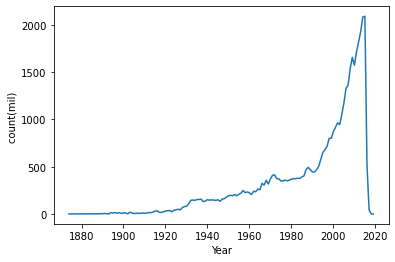

In [24]:
# Analysis using graph 'count(mil)' vs year
#years = film_data['Year'].drop_duplicates()
years = [Year for Year, df in film_data.groupby(['year'])]
plt.plot(years,film_data.groupby(['year']).count()['imdbRating'])
plt.ylabel('count(mil) ')
plt.xlabel('Year')
plt.show()

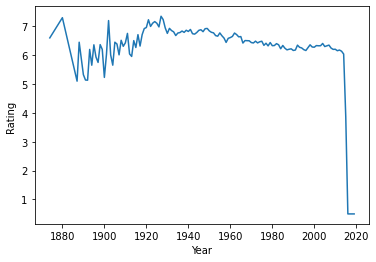

In [25]:
# Analysis using grapgh, rating vs year
years = [Year for Year, df in film_data.groupby(['year'])]
plt.plot(years,film_data.groupby(['year']).mean()['imdbRating'])
plt.ylabel('Rating ')
plt.xlabel('Year')
plt.show()

In [26]:
# to view how many different types of variables are there in the genre column
len(film_data['genre'].unique())

552

#### Some genre statistic graphs is done below

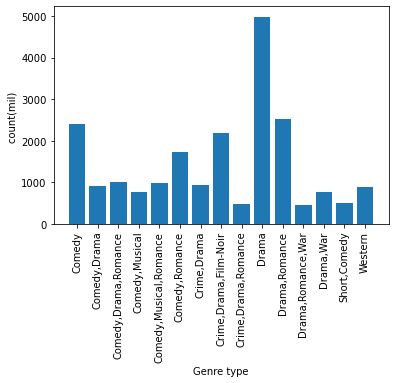

In [27]:
# Some genre statistic to explore what genre was most filmed in which year
types=film_data['genre'].value_counts()[film_data['genre'].value_counts()>400]##more than 1%-we will display just most rewied gesres
types=pd.DataFrame(types)
types['genre'] = types.index
genre_reduced = pd.merge(types, film_data, on="genre")
Genre = [Genre for Genre, df in genre_reduced.groupby(['genre'])]
plt.bar(Genre,genre_reduced.groupby(['genre']).count()['imdbRating'])
plt.xticks(Genre, rotation='vertical', size=10)
plt.ylabel('count(mil) ')
plt.xlabel('Genre type')
plt.show()

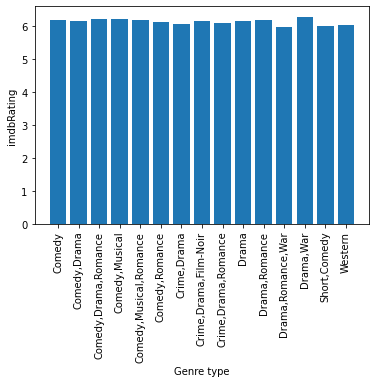

In [28]:
# imdbRating vs genre type
plt.bar(Genre,genre_reduced.groupby(['genre']).mean()['imdbRating'])
plt.xticks(Genre, rotation='vertical', size=10)
plt.ylabel('imdbRating')
plt.xlabel('Genre type')
plt.show()

To print out all the genres in the movies_initial dataframe

In [29]:
# unique genre names
genre_names = [] # List for all genres
for i in range(0,len(film_data)): # Loop through movies dataframe
    genres_unique = str(film_data.genre[i]).split(',') # Split the genres string for that movie into individual genres
    for genre in genres_unique:
        if genre not in genre_names: # Add the genre to the list of genres if not already in the list
            genre_names.append(genre)
print('There are',len(genre_names),'unique genres.')
print('The genres are:',genre_names)

There are 25 unique genres.
The genres are: ['Documentary', 'Short', 'Animation', 'Comedy', 'Horror', 'Biography', 'Fantasy', 'Drama', 'Adventure', 'Action', 'Western', 'Music', 'Family', 'Crime', 'War', 'Romance', 'History', 'Sci-Fi', 'Mystery', 'Sport', 'Thriller', '0.5', 'Musical', 'Film-Noir', 'genre']


To plot a bar chart for the genre frequency showing how often each genre appears in the movies.

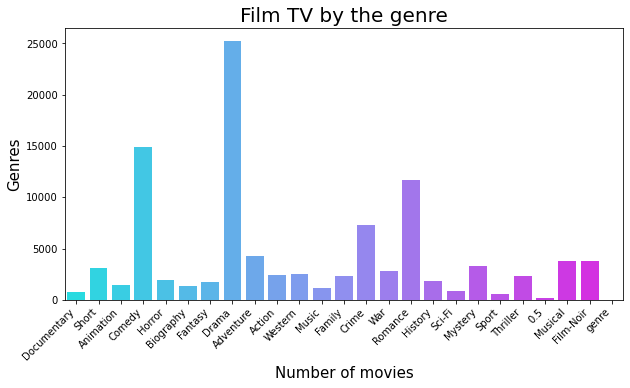

In [30]:
# bar graph for genre frequency

import seaborn as sns
genres_vals = [] # List for number of times each genre in genre_names appears in the movies dataframe
for i, genre in enumerate(genre_names): # Loop over genres
    num=0 # Start with zero times
    for j in range(0,len(film_data)): # Loop through movies
        genres_unique = str(film_data.genre[j]).split(',')
        if genre in genres_unique:
            num=num+1
    genres_vals.append(num) 
# Make the plot
plt.figure(figsize=(10,5))
plt.title('Film TV by the genre', size=20)
sns.barplot(x=genre_names, y=genres_vals, palette="cool")
plt.ylabel('Genres', size=15)
plt.xlabel('Number of movies',size=15)
plt.xticks(rotation=45, ha='right')
plt.show()


 Printing a list of the genres below sorted from the most popular to the least

In [31]:
# Print out the most common genres in descending order
genres_dict = {} # Create a dictionary of genre names and number of movies listed under the genre
for i, genre in enumerate(genre_names): genres_dict.update({genre : genres_vals[i]})

# Sort genres in descending order (need to use reverse=True for descending)  
genres_movies_sorted = dict(sorted(genres_dict.items(), key=lambda x:x[1], reverse=True)) 
print('Genres in order of number of movies listed under that cetegory (from highest to lowest):')   
for key in genres_movies_sorted:
    print(key)

Genres in order of number of movies listed under that cetegory (from highest to lowest):
Drama
Comedy
Romance
Crime
Adventure
Film-Noir
Musical
Mystery
Short
War
Western
Action
Family
Thriller
Horror
History
Fantasy
Animation
Biography
Music
Sci-Fi
Documentary
Sport
0.5
genre


To analyse multi genres films are more popular or single genres

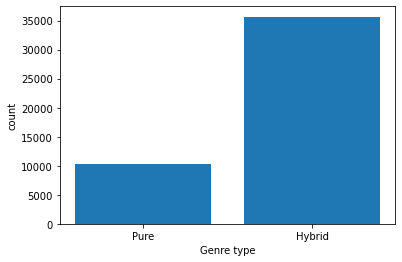

In [32]:
# to check whether multigenres films or single genres films more popular?
genres_types = ['Pure','Hybrid']
plt.bar(genres_types,[film_data[~film_data['genre'].str.contains(',', regex=False, case=False, na=False)].count()['imdbID'],film_data[film_data['genre'].str.contains(',', regex=False, case=False, na=False)].count()['imdbID']])
plt.ylabel('count')
plt.xlabel('Genre type')
plt.show()

From the above graph we can say hybrid films are more popular when compared to pure(single) genre films

In [33]:
# to check whether there is any empty genres
print('There are',len(film_data.loc[film_data['genre']=='(no genres listed)']),'movies with no genres listed.')
movies_genres = film_data.drop(film_data.loc[film_data['genre']=='(no genres listed)'].index)
genre_names_new = genre_names[:-1]

There are 0 movies with no genres listed.


 ## Methods used for recommendation systems

### Content based filtering 

Content-based filtering is a machine learning technique which estimates similarities in features to make decisions, these methods are used in recommendation systems usually. These algorithms are designed to recommend things to users based on knowledge collected about the user. In this model the recommendations are specific to each user, since it does not require any data of other users, therefore making it easier to scale large number of users.

In [59]:
# lets create an Interactive Function to get the List of Best Movies from Each Genre

# for Interactive Analysis
from ipywidgets import interact

@interact
def genres(Genres = [ 'Action', 'Adventure', 'Adult', 'Animation', 'Biograpghy', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir','History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
          year = sorted(film_data['year'].unique(), reverse=True)):
    x = film_data['genre'].str.split(',')
    d = film_data.drop(['genre'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genre')
    x= x[(x['genre'] == Genres)& 
         (x['year'] >= year)][['title', 'imdbRating', 'year']].sort_values(by = ['imdbRating','year'],
                            ascending = [False,True]).reset_index(drop = True).head(10)
    return x


interactive(children=(Dropdown(description='Genres', options=('Action', 'Adventure', 'Adult', 'Animation', 'Bi…

In the above results the user needs to choose the year(2016) to display all the recommendations from the same year, to a specific movie. 

### K-Means clustering

'K-Means clustering' is the most popular unsupervised learning algorithm, that does not have a target variable . This algorithm is used to find groups which have not been explicitly labeled in the data. K-Means algorithm is used to assign each data point to one of K groups based on the features that are provided in an iterative pattern. Some of the applications are Image segmentation, Recommendation System.

#### Clustering based on individual movies
These clusters can then be used to recommend movies based on genre. For example, an individual belonging to a cluster whose members like action and comedy movies but not adventure would be recommended movies from the first two genres.

In [35]:
# Import the movies dataset
f_data = pd.read_csv('movies_dataset.csv',encoding='unicode_escape')
#preview the dataset
f_data.head(5)

,Index,imdb_ID,title,imdbRating,genre
0,0,1,Pulp Fiction (1994),5.0,Comedy|Crime|Drama|Thriller
1,1,1,Three Colors: Red (Trois couleurs: Rouge) (1994),3.5,Drama
2,2,1,Three Colors: Blue (Trois couleurs: Bleu) (1993),5.0,Drama
3,3,1,Underground (1995),5.0,Comedy|Drama|War
4,4,1,Singin' in the Rain (1952),3.5,Comedy|Musical|Romance


I have taken a smaller dataset 'movies_dataset', due to lack of memory storage. This dataframe initially has ten thousand movies in total. 

In [36]:
# to pivot the dataframe so rows are users and columns are movie ratings
user_movie_ratings = pd.pivot_table(f_data, index='imdb_ID', columns= 'title', values='imdbRating')
# to check the dimensions of the new dataframe
print('Dataframe dimensions: ', user_movie_ratings.shape)
user_movie_ratings.head()

Dataframe dimensions:  (75, 3286)


title,$5 a Day (2008),'Round Midnight (1986),"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 (1979),10 Rillington Place (1971),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),...,Your Friends and Neighbors (1998),Z (1969),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zombieland (2009),Zoolander (2001),Zootopia (2016),xXx (2002),xXx: State of the Union (2005),ýýThree Amigos! (1986)
imdb_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.5,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen above, most entries in the dataframe contain "NaN" values as most users have rated only a small fraction of the movies. 

In [37]:
# to preview the no of rows and columns
f_data.shape

(9999, 5)

To filter users by number of rated movies

In [38]:
# Filter movies by number of ratings
def subset_by_rating_density(user_movie_ratings, max_number_of_movies, max_number_of_users):
    
    # Count number of ratings and append a row containing the counts received for each movie
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # Sort columns according to last row numbers
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    # Delete the last row
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # Slice the columns to the desired max_number_of_movies
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies].copy()
    
    # Create new colum with the number of not null cases
    most_rated_movies["user_num_ratings"] = most_rated_movies.notnull().sum(axis=1) # Sum over columns
    # Sort rows by the value of this column
    most_rated_movies_sorted = most_rated_movies.sort_values(by="user_num_ratings", axis=0, ascending=False)
    # Delete the column
    del most_rated_movies_sorted["user_num_ratings"]
    # Slice rows to the desired max_number_of_users
    finaldf = most_rated_movies_sorted.iloc[:max_number_of_users, :].copy()
    
    return(finaldf)

Let's show how this function works for the top 15 rated titles and the 25 users who have rated the most number of movies

In [39]:
max_movies = 10 # Number of top rated movies
max_users = 15 # Number of "top" users (users who rate the most movies)

# Get a subset of the user_movie_ratings df
subset = subset_by_rating_density(user_movie_ratings, max_movies, max_users)

# View the df
subset

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_4808\1859238187.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


title,Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)","Matrix, The (1999)",Jurassic Park (1993),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Schindler's List (1993)
58,4.0,3.0,3.0,4.5,4.0,4.0,4.0,4.5,4.0,4.0
2,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0
71,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0
30,1.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.5,2.5
69,4.0,4.5,4.0,3.5,3.5,3.5,3.5,4.0,3.5,4.5
42,4.5,5.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,3.5
11,5.0,5.0,4.0,4.0,4.5,NaN,4.0,4.0,5.0,5.0
12,4.5,5.0,5.0,4.5,4.5,4.5,4.0,4.0,5.0,NaN
22,5.0,5.0,5.0,5.0,5.0,1.0,NaN,5.0,5.0,5.0
68,5.0,5.0,5.0,5.0,NaN,5.0,4.5,5.0,5.0,5.0



Subsetting the dataframe shows fewer NaNs. To plot the heatmap for visual representation of the rating values of the top-rated movies by user.

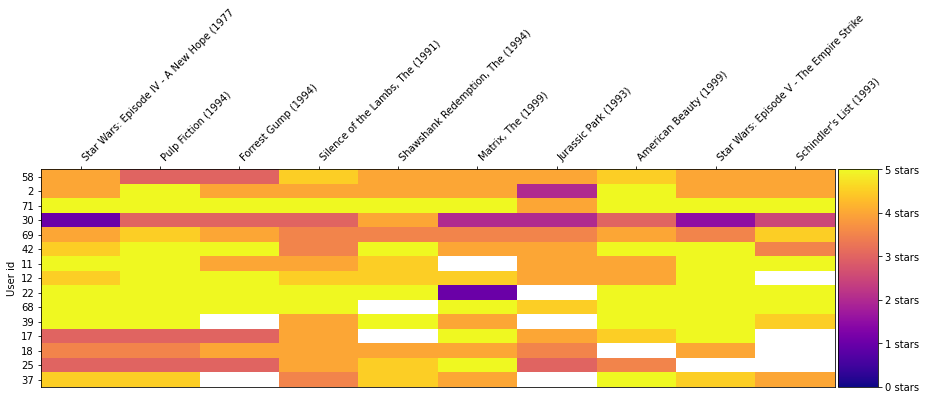

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Creating the movies_initial heatmap
def draw_movies_heatmap(user_movie_ratings, cmap_name="plasma", axis_labels=True, figsize=(15,4)):
    # Create the figure
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    # Drawing heatmap
    heatmap = ax.imshow(user_movie_ratings, cmap=plt.get_cmap(cmap_name), interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    # to deal with the axes
    if axis_labels:
    # to set X and Y axes labels
        ax.set_yticks(np.arange(user_movie_ratings.shape[0]) , minor=False)
        ax.set_xticks(np.arange(user_movie_ratings.shape[1]) , minor=False)
        ax.xaxis.tick_top()
        labels = user_movie_ratings.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(user_movie_ratings.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=45, ha='left')
    else:
        # to remove X and Y axis labels
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    ax.grid(False)
    ax.set_ylabel('User id')
    # to separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    # to format the colorbar on the right
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    
    plt.show()
    
# plotting the heatmap for the subset above    
draw_movies_heatmap(subset)

Here in the heatmap yellow is for 5 stars and to the extreme purple colour it is 0 stars. This way of showing user ratings allows us to find patterns very quickly. For example, "Star Wars: Episode IV - A New Hope" and "The Matrix" have very high ratings. Also, rows with similiar color patterns to each other can identify users with similar taste. Users that have a similar colour across movies will mostly give a similar rating to all movies they have watched.


### Building the movie recommender
To create a subset to use for our movie recommender system.
To use Top 1000 most-rated movies and include all 75 users in the dataset.

In [41]:
# Creating a subset with all users 75 and most-rated 1000 movies only
max_movies = 1000 # Number of top rated movies
max_users = 75 # Number of users

top_1000_movies = subset_by_rating_density(user_movie_ratings, max_movies, max_users)

# View the df:
top_1000_movies.head()

C:\Users\GOKUL\AppData\Local\Temp\ipykernel_4808\1859238187.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


title,Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)","Matrix, The (1999)",Jurassic Park (1993),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Schindler's List (1993),...,Jack (1996),"Aviator, The (2004)",It Could Happen to You (1994),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Scream 3 (2000),Iron Man 3 (2013),"Mighty Wind, A (2003)","Incredible Hulk, The (2008)",Ip Man (2008),Intouchables (2011)
71,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
11,5.0,5.0,4.0,4.0,4.5,NaN,4.0,4.0,5.0,5.0,...,2.0,NaN,NaN,3.5,NaN,NaN,3.5,NaN,NaN,NaN
42,4.5,5.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,3.5,...,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,4.0,NaN
30,1.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.5,2.5,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### K-Means clustering algorithm
Although we have chosen only the top 1000 movies, the dataframe will still contain many NaN entries. Hence formatting the dataframe with lots of Nans to a csr_matrix from scipy package can be done.


In [44]:
# After aparsing it contains only non-null entries 
import numpy as np
from scipy.sparse import csr_matrix

# to convert to a pandas sparse dataframe type
df_sparsed = top_1000_movies.astype(pd.SparseDtype('float', np.nan))
df_sparsed.fillna(0, inplace =True)

df_sparsed.head()


title,Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)","Matrix, The (1999)",Jurassic Park (1993),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Schindler's List (1993),...,Jack (1996),"Aviator, The (2004)",It Could Happen to You (1994),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Scream 3 (2000),Iron Man 3 (2013),"Mighty Wind, A (2003)","Incredible Hulk, The (2008)",Ip Man (2008),Intouchables (2011)
71,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
11,5.0,5.0,4.0,4.0,4.5,0.0,4.0,4.0,5.0,5.0,...,2.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,0.0,0.0
42,4.5,5.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,3.5,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0
30,1.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.5,2.5,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Converting to scipy sparse csr_matrix
df_test=df_sparsed.sparse.to_coo()
sparse_ratings = csr_matrix(df_sparsed.sparse.to_coo()) 
df_sparsed.head()

title,Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)","Matrix, The (1999)",Jurassic Park (1993),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),Schindler's List (1993),...,Jack (1996),"Aviator, The (2004)",It Could Happen to You (1994),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Scream 3 (2000),Iron Man 3 (2013),"Mighty Wind, A (2003)","Incredible Hulk, The (2008)",Ip Man (2008),Intouchables (2011)
71,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,...,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
11,5.0,5.0,4.0,4.0,4.5,0.0,4.0,4.0,5.0,5.0,...,2.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,0.0,0.0
42,4.5,5.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,3.5,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,4.0,0.0
30,1.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.5,2.5,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#!pip install KMeans
from sklearn.cluster import KMeans
# Specifiy number of clusters to use
k = 20
kmeans_top_1000_movies = KMeans(n_clusters=k,random_state=2).fit(sparse_ratings)
# to get the cluster each user has been assigned
predictions = kmeans_top_1000_movies.predict(sparse_ratings) 
clustered = top_1000_movies.reset_index() # set "clustered" equal to "top_1000_movies" and reset index
clustered = clustered.rename(columns={"index" : "UserId"}) # rename index column as userid (we will need this for the recommender)
clustered["cluster"] = predictions # Add a column called *cluster* that contains the cluster assigned to the user

# to look at the new dataframe with users assigned to clusters
clustered.head(10)

title,UserId,Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),Forrest Gump (1994),"Silence of the Lambs, The (1991)","Shawshank Redemption, The (1994)","Matrix, The (1999)",Jurassic Park (1993),American Beauty (1999),Star Wars: Episode V - The Empire Strikes Back (1980),...,"Aviator, The (2004)",It Could Happen to You (1994),Wallace & Gromit in The Curse of the Were-Rabbit (2005),Scream 3 (2000),Iron Man 3 (2013),"Mighty Wind, A (2003)","Incredible Hulk, The (2008)",Ip Man (2008),Intouchables (2011),cluster
0,71,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1
1,11,5.0,5.0,4.0,4.0,4.5,NaN,4.0,4.0,5.0,...,NaN,NaN,3.5,NaN,NaN,3.5,NaN,NaN,NaN,4
2,42,4.5,5.0,5.0,3.5,5.0,4.0,4.0,5.0,5.0,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,13
3,2,4.0,5.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,...,NaN,NaN,NaN,NaN,4.0,NaN,3.0,4.0,NaN,16
4,30,1.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.5,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,12,4.5,5.0,5.0,4.5,4.5,4.5,4.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.0,NaN,7
6,22,5.0,5.0,5.0,5.0,5.0,1.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,18,3.5,3.5,4.0,4.0,4.0,4.0,3.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,3.5,14
8,56,4.0,4.0,4.0,4.5,4.5,NaN,3.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,58,4.0,3.0,3.0,4.5,4.0,4.0,4.0,4.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [49]:
# Check *cluster* contains 20 subgroups:
print('The dataset is divided into',len(clustered.cluster.unique()),'subgroups.')

The dataset is divided into 20 subgroups.


The movie recommender is aimed on the highest rated movies in the cluster assigned to the user. Movies are recommended only if the user hasn't rated yet. 

In [58]:
# movie recommender function
import math

def movie_recommender(user,nrec,clustered): 

    # Get the cluster the user belongs to
    subgroup_user = clustered.loc[clustered["UserId"]==user].cluster.tolist()[0]

    # Sort the cluster by highest rated movie first 
    movies_dict = {} # Creating a dictionary with movie titles and average rating for that title in the cluster
    for i, imdbRating in enumerate(kmeans_top_1000_movies.cluster_centers_[subgroup_user]): movies_dict.update({clustered.columns[1:-1].tolist()[i] : imdbRating})

    # Sort titles in descending order of 'mean rating in cluster' (need to use reverse=True for descending)  
    movies_titles_sorted = dict(sorted(movies_dict.items(), key=lambda x:x[1], reverse=True)) 
    
    # Now loop through the top movie titles and recommend titles not yet watched by the user
    #rating_keep = [] # testing
    recommended_movies = {} # Dictionary for recommended movie titles and cluster average rating
    for i, title in enumerate(movies_titles_sorted):
        # Stop looping through the movies list if reached required number of recommendations
        if len(recommended_movies) == nrec:
            break     
    
        # Get the rating the user gave the movie
        imdbRating = clustered[str(title)].loc[clustered["UserId"]==user].tolist()[0]
        
        # If the user didn't rate the movie then adding it to the recommended movies list
        if math.isnan(imdbRating) == True:   
            # to get the cluster avg. rating
            rating_cluster_avg = movies_titles_sorted.get(title)
            # Adding a title and avg. rating to dictionary
            recommended_movies[str(title)] = rating_cluster_avg
    
    return recommended_movies, subgroup_user, movies_titles_sorted


# Choosing a user to recommend a list of titles     
user=71

# Choosing number of titles to recommend
nrec=5

# to get the titles (and interesting cluster information) using the movie recommender
recommended_titles, subgroup_user, movies_titles_sorted = movie_recommender(user,nrec,clustered)
print('User', user, 'is in cluster', subgroup_user,'\n')

# to print out the top rated titles from the cluster
top = 10
num = 0
print('The top', top, 'rated movies in cluster', subgroup_user,'are:\n')   
for title in movies_titles_sorted:
    print(title)
    num = num + 1
    if num >= top:
        break
print('\n')
        
# to print out the recommended titles
print('Recommended movies for user',user,'are:\n')
for title in recommended_titles:
    print(title,'( cluster average rating:',round(recommended_titles.get(title),1),')')

User 42 is in cluster 13 

The top 10 rated movies in cluster 13 are:

Pulp Fiction (1994)
Forrest Gump (1994)
Shawshank Redemption, The (1994)
American Beauty (1999)
Star Wars: Episode V - The Empire Strikes Back (1980)
Usual Suspects, The (1995)
Fight Club (1999)
Monty Python and the Holy Grail (1975)
Blade Runner (1982)
Princess Bride, The (1987)


Recommended movies for user 42 are:

Godfather, The (1972) ( cluster average rating: 0.0 )
Dark Knight, The (2008) ( cluster average rating: 0.0 )
Trainspotting (1996) ( cluster average rating: 0.0 )
American History X (1998) ( cluster average rating: 0.0 )
Mission: Impossible (1996) ( cluster average rating: 0.0 )


The expected output will return the top 10 rated movies and the top 5 recommended movies alongside the average rating of the movie according to the other users in the same cluster.

# Collaborative filtering

Collaborative Filtering model also called as social filtering is built by collecting user-item interactions. Amazon is one such example. 

In [297]:
# groupby function over title and rating
f_data.groupby('title')['imdbRating'].mean().sort_values(ascending=False).head(10)

title
Across the Universe (2007)                                                      5.0
Castle, The (1997)                                                              5.0
Moana (2016)                                                                    5.0
Man Who Planted Trees, The (Homme qui plantait des arbres, L') (1987)           5.0
Man Who Would Be King, The (1975)                                               5.0
To Be and to Have (ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½tre                                        5.0
Titanic (1953)                                                                  5.0
Kamikaze Girls (Shimotsuma monogatari) (2004)                                   5.0
Disappearance of Haruhi Suzumiya, The (Suzumiya Haruhi no shï¿½ï¿½ï¿½ï¿½ï¿½ï    5.0
Funny Face (1957)                                                               5.0
Name: imdbRating, dtype: float64

In [298]:
# The rating is arranged in ascending order
f_data.groupby('title')['imdbRating'].count().sort_values(ascending=False).head(10)

title
Star Wars: Episode IV - A New Hope (1977)                42
Pulp Fiction (1994)                                      37
Forrest Gump (1994)                                      37
Silence of the Lambs, The (1991)                         37
Shawshank Redemption, The (1994)                         36
Matrix, The (1999)                                       33
Jurassic Park (1993)                                     32
American Beauty (1999)                                   31
Star Wars: Episode V - The Empire Strikes Back (1980)    31
Schindler's List (1993)                                  31
Name: imdbRating, dtype: int64

The above results are movies with total count of ratings of each

In [299]:
# Mean rating
ratings=pd.DataFrame(f_data.groupby('title')['imdbRating'].mean())
ratings.head()

,imdbRating
title,
$5 a Day (2008),4.0
'Round Midnight (1986),4.0
"'burbs, The (1989)",2.5
(500) Days of Summer (2009),3.5
...And Justice for All (1979),2.5


The above output is the mean of the rating to the movies.

In [300]:
# to display first 10 from the final dataframe
ratings.sort_values('imdbRating', ascending=False).head(10)

,imdbRating
title,
Across the Universe (2007),5.0
"Castle, The (1997)",5.0
Moana (2016),5.0
"Man Who Planted Trees, The (Homme qui plantait des arbres, L') (1987)",5.0
"Man Who Would Be King, The (1975)",5.0
To Be and to Have (ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½tre,5.0
Titanic (1953),5.0
Kamikaze Girls (Shimotsuma monogatari) (2004),5.0
"Disappearance of Haruhi Suzumiya, The (Suzumiya Haruhi no shï¿½ï¿½ï¿½ï¿½ï¿½ï",5.0


The above results is final rating for each movie.

In [301]:
# to create a new variable rating_number
ratings['rating_number']=f_data.groupby('title')['imdbRating'].count()
ratings.head(10)

,imdbRating,rating_number
title,,
$5 a Day (2008),4.000000,1
'Round Midnight (1986),4.000000,1
"'burbs, The (1989)",2.500000,2
(500) Days of Summer (2009),3.500000,3
...And Justice for All (1979),2.500000,1
10 (1979),3.333333,3
10 Rillington Place (1971),3.500000,1
10 Things I Hate About You (1999),3.750000,4
101 Dalmatians (1996),2.875000,4


In the above output a new variable rating_number is counted.

In [303]:
#to display the results 
moviemat = f_data.pivot_table(index='imdb_ID', columns='title', values='imdbRating')
moviemat.head()

title,$5 a Day (2008),'Round Midnight (1986),"'burbs, The (1989)",(500) Days of Summer (2009),...And Justice for All (1979),10 (1979),10 Rillington Place (1971),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),...,Your Friends and Neighbors (1998),Z (1969),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zombieland (2009),Zoolander (2001),Zootopia (2016),xXx (2002),xXx: State of the Union (2005),ýýThree Amigos! (1986)
imdb_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.5,NaN,3.5,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.5,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
# recommendation algorithm
def recommendMovies(name , min_rating_count = 2):
    user_rating = moviemat[name]
    similar_movies = moviemat.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
    corr_movies.dropna(inplace=True)
    # for recommending a movie
    corr_movies = corr_movies.join(ratings['imdbRating'], how='left', lsuffix='_left', rsuffix='_right')
    
    final = corr_movies[corr_movies['imdbRating']>min_rating_count].sort_values('Correlation', ascending=False)
    return final

In [305]:
# recommended list of movies to the user
recommendations = recommendMovies('Zombieland (2009)')
recommendations.head()

C:\Users\GOKUL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\GOKUL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,imdbRating
title,,
Zombieland (2009),1.0,3.833333
"Dark Knight, The (2008)",1.0,4.289474
Pitch Black (2000),1.0,4.083333
Office Space (1999),1.0,4.000000
Ocean's Eleven (2001),1.0,3.785714


This recommendation system provides 5 movies for the user to watch based on the title.

### Results


From the above three techniques or algorithms, we get to know that K-Means clustering provides the best suggestions to the user based on the rating and the year of the movies. While Content based filtering technique and Collaborative filtering have some drawbacks like, they require a lot of data to recommend movies of similar taste to the users.